# Atividade Extra

---

**Aluna:** Letícia Moura Pinheiro

**Matrícula:**  20170059474

**Email:** leticiampinheiro@ufrn.edu.br


<img width="60" src="https://drive.google.com/uc?export=view&id=1JQRWCUpJNAvselJbC_K5xa5mcKl1gBQe"> 

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print("User uploaded file '{name}'with lenth {length} bytes".format(
      name=fn, length=len(uploaded[fn])))

Saving votacao_candidato_munzona_2018_BR.csv to votacao_candidato_munzona_2018_BR (2).csv
Saving votacao_candidato_munzona_2018_RN.csv to votacao_candidato_munzona_2018_RN (1).csv
User uploaded file 'votacao_candidato_munzona_2018_BR.csv'with lenth 33446861 bytes
User uploaded file 'votacao_candidato_munzona_2018_RN.csv'with lenth 34141232 bytes


In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df_br = pd.read_csv("votacao_candidato_munzona_2018_BR.csv", encoding='latin-1', delimiter =";")
df_rn = pd.read_csv("votacao_candidato_munzona_2018_RN.csv", encoding='latin-1', delimiter =";")

# 1 - Votos por coligações

  Objetivando identificar o viés politico da sociedade, este gráfico mostra a quantidade de votos (em milhões) por coligações. Será apresentado 9 coligações, que são compostas pelos seguintes partidos:

*   **VAMOS SEM MEDO DE MUDAR O BRASIL:** PSOL
*   **MUDANÇA DE VERDADE:** PODE
*   **UNIDOS PARA TRANSFORMAR O BRASIL:** REDE
*   **ESSA É A SOLUÇÃO:** MDB
*   **PARTIDO ISOLADO:**  PATRI, PPL, NOVO, DC, PSTU
*   **PARA UNIR O BRASIL:** PSDB
*   **BRASIL SOBERANO:** PDT
*   **O POVO FELIZ DE NOVO:** PT
*   **BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS: ** PSL



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


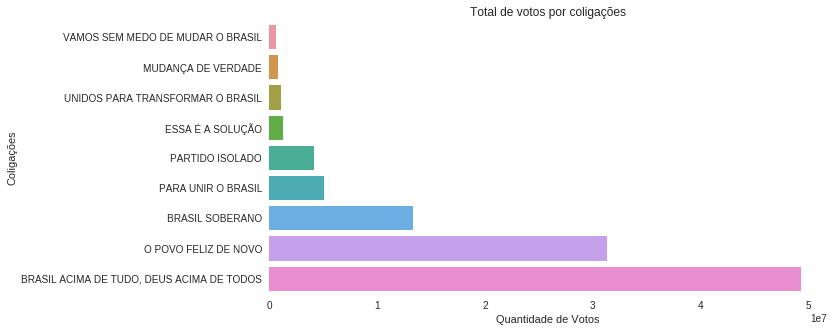

In [9]:
coligacao_voto = df_br.pivot_table(values=['QT_VOTOS_NOMINAIS'], 
                                   index=['NM_COLIGACAO'], 
                                   aggfunc='sum').reset_index().sort_values(by="QT_VOTOS_NOMINAIS")

sns.set(style="white")
plt.figure(figsize=(10,5))
graf_colig_voto = sns.barplot(y=coligacao_voto["NM_COLIGACAO"], x=coligacao_voto["QT_VOTOS_NOMINAIS"])

plt.ylabel('Coligações')
plt.xlabel('Quantidade de Votos')
plt.title('Total de votos por coligações')

graf_colig_voto.spines["right"].set_visible(False)
graf_colig_voto.spines["bottom"].set_visible(False)
graf_colig_voto.spines["top"].set_visible(False)
graf_colig_voto.spines["left"].set_visible(False)

plt.show()

# 2 - Distribuição de votos válidos por UF

Neste tópico é possível ver a distribuição de votos em cada estado brasileiro. A coluna "ZZ" refere-se aos votos de pessoas no exterior.


In [0]:
votos_por_uf = df_br[["SG_UF","QT_VOTOS_NOMINAIS"]].groupby("QT_VOTOS_NOMINAIS").sum().reset_index()

plt.figure(figsize=(15,10))
sns.set(style="white")
graf_votos_uf = sns.barplot(x=votos_por_uf["SG_UF"], y=votos_por_uf["QT_VOTOS_NOMINAIS"])

plt.xticks(rotation= 45)
plt.xlabel('Estados')
plt.ylabel('Quantidade de Votos')
plt.title('Total de votos por estado')

graf_votos_uf.spines["right"].set_visible(False)
graf_votos_uf.spines["bottom"].set_visible(False)
graf_votos_uf.spines["top"].set_visible(False)
graf_votos_uf.spines["left"].set_visible(False)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


# 3 - Votos recebidos pelos candidatos ao 2° turno

  Neste tópico será analisado a quantidade de votos por candidatos ao segundo turno. Ele foi dividido em 3 subanálises. Os dois primeiros referem-se aos candidatos à presidência, Jair Bolsonaro e Fernando Haddad, e o terceiro faz referência aos candidatos à governador do Rio Grande do Norte (RN).
  
  
## Candidatos à presidência

  No primeiro gráfico, foi selecionado apenas os votos do RN, e pode-se notar que o candidato Fernando Haddad continua à frente de Jair Bolsonaro. Mas agora olhando de forma mais ampla, no segundo gráfico, que mostra os votos em todo país, ocorre o contrário, Bolsonaro está com a maior quantidade de votos.
  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


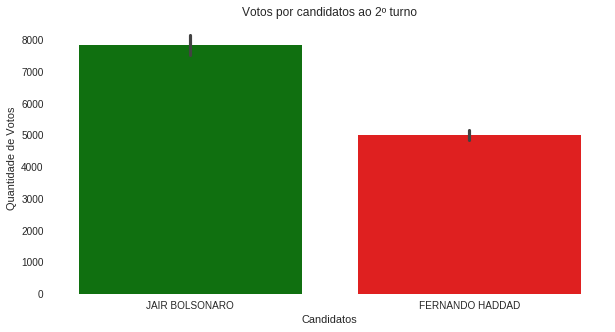

In [4]:
#RESULTADOS BR
candidatos_2_turno = df_br[df_br["DS_SIT_TOT_TURNO"]=='2º TURNO']

sns.set(style="white")
plt.figure(figsize=(15,10))
graf_voto_candidato = sns.barplot(x=candidatos_2_turno['NM_URNA_CANDIDATO'], y=candidatos_2_turno["QT_VOTOS_NOMINAIS"], palette=['green','red'])
plt.xlabel('Candidatos')
plt.ylabel('Quantidade de Votos')
plt.title('Votos por candidatos ao 2º turno')

graf_voto_candidato.spines["right"].set_visible(False)
graf_voto_candidato.spines["bottom"].set_visible(False)
graf_voto_candidato.spines["top"].set_visible(False)
graf_voto_candidato.spines["left"].set_visible(False)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


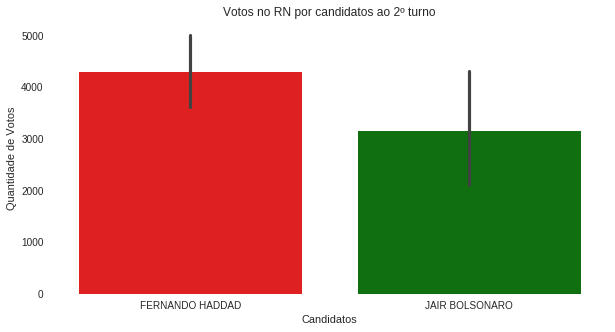

In [5]:
#RESULTADOS RN
candidatos_2_turno_rn = candidatos_2_turno[candidatos_2_turno['SG_UF'] == "RN"]

sns.set(style="white")
plt.figure(figsize=(10,5))
graf_voto_candidato_rn = sns.barplot(x=candidatos_2_turno_rn['NM_URNA_CANDIDATO'], y=candidatos_2_turno_rn["QT_VOTOS_NOMINAIS"], palette=['red','green'])

plt.xlabel('Candidatos')
plt.ylabel('Quantidade de Votos')
plt.title('Votos no RN por candidatos ao 2º turno')

graf_voto_candidato_rn.spines["right"].set_visible(False)
graf_voto_candidato_rn.spines["bottom"].set_visible(False)
graf_voto_candidato_rn.spines["top"].set_visible(False)
graf_voto_candidato_rn.spines["left"].set_visible(False)

plt.show()

## Candidatos à governador do RN

Agora, os candidatos à governador do RN. No segundo turno, a população Norte Riograndense deverá decidir entre Fátima Bezerra (PT) e Carlos Eduardo (PDT). O gráfico mostra uma diferença de aproximadamente 17% entre eles, com a candidata Fátima Bezerra com a maior porcentagem dos votos.

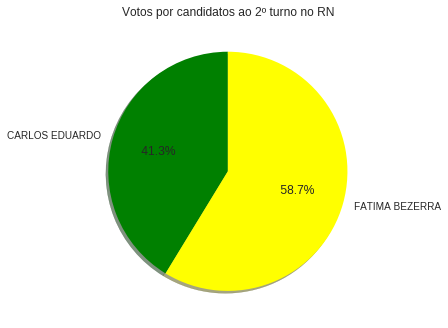

In [6]:
turno2_rn = df_rn[df_rn['DS_SIT_TOT_TURNO'] == '2º TURNO'][["QT_VOTOS_NOMINAIS",'NM_URNA_CANDIDATO']].groupby('NM_URNA_CANDIDATO').sum().reset_index()

labels = turno2_rn['NM_URNA_CANDIDATO']
sizes = turno2_rn["QT_VOTOS_NOMINAIS"]
colors = ['green','yellow']

fig , ax = plt.subplots(subplot_kw = dict(aspect="equal"))
ax.pie (sizes, labels = labels , autopct = ' %1.1f%% ',shadow = True , startangle = 90, colors = colors)
ax.set_title("Votos por candidatos ao 2º turno no RN")

plt.show()

# 4 - Votos por zonas eleitorais em Natal

  Este gráfico foi pensado com objetivo de verificar a distribuição de pessoas por zonas eleitorais em Natal/RN. Para isso, foi utilizado a quantidade de votos e as cinco zonas do município. 

Com base no gráfico, é perceptível a cuidadosa divisão de pessoas nas zonas eleitorais. Divisão essa muito importante para evitar alguns transtornos, como a longa espera em filas para votar.

Obs: As informações a respeito das zonas eleitorais em Natal foram tiradas no site do  [TRE](http://www.tre-rn.jus.br/o-tre/zonas-eleitorais/enderecos-e-telefones/enderecos-e-telefones-das-zonas-eleitorais-do-rn).

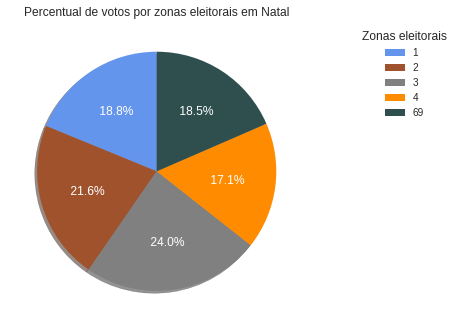

In [68]:
edf_zonas_natal = pd.DataFrame(df_rn, columns=['NR_ZONA','QT_VOTOS_NOMINAIS']).groupby("NR_ZONA").sum().iloc[[0,1,2,3,-1],:].reset_index()
total_votos_zona_natal = df_zonas_natal["QT_VOTOS_NOMINAIS"].sum()

labels = df_zonas_natal["NR_ZONA"]
sizes = df_zonas_natal["QT_VOTOS_NOMINAIS"]
colors = ['CornflowerBlue','Sienna','Gray','DarkOrange','DarkSlateGray']

fig1 , ax = plt.subplots(subplot_kw = dict(aspect="equal"))
ax.pie (sizes, labels = labels , autopct = ' %1.1f%% ',shadow = True , startangle = 90, colors = colors, textprops = dict(color="w"))
ax.legend(title="Zonas eleitorais", loc="best", bbox_to_anchor = (1 , 0 , 0.5 , 1))
ax.set_title("Percentual de votos por zonas eleitorais em Natal")

plt.show()

# 5 - Número de candidatos do RN por partido

Este gráfico tem como objetivo observar quantos candidatos no Rio Grande do Norte  estão filiados à cada partido. Percebe-se uma maior concentração de candidatos nos partidos Solidariedade e PSOL.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


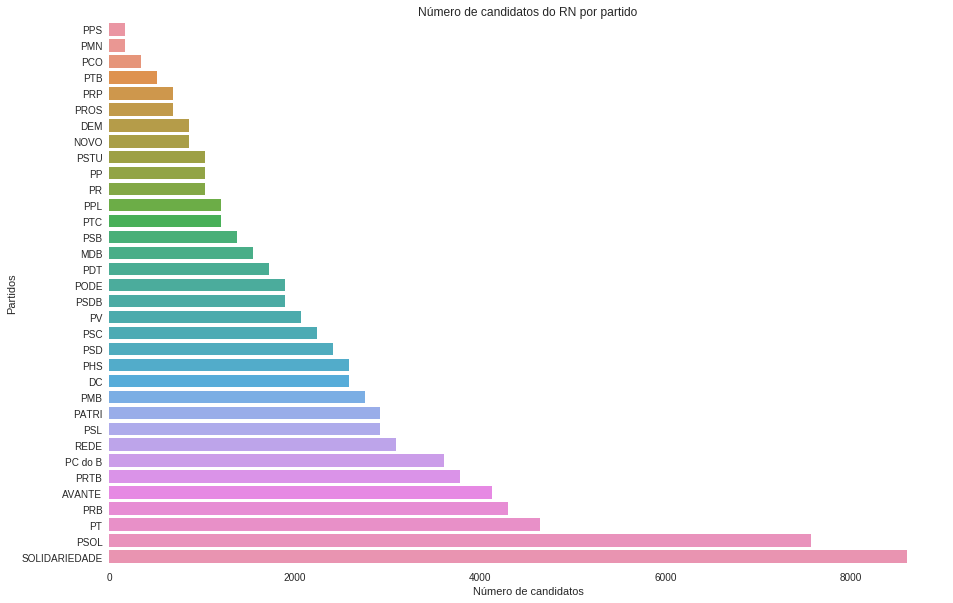

In [7]:
candit_partido = df_rn.pivot_table(values=["NM_URNA_CANDIDATO"], index=["SG_PARTIDO"], aggfunc='count').reset_index().sort_values(by="NM_URNA_CANDIDATO")

sns.set(style="white")
plt.figure(figsize=(15,10))
graf_cand_part = sns.barplot(x=candit_partido["NM_URNA_CANDIDATO"], y=candit_partido["SG_PARTIDO"])

plt.xlabel("Número de candidatos")
plt.ylabel("Partidos")
plt.title("Número de candidatos do RN por partido")

graf_cand_part.spines["right"].set_visible(False)
graf_cand_part.spines["bottom"].set_visible(False)
graf_cand_part.spines["top"].set_visible(False)
graf_cand_part.spines["left"].set_visible(False)

plt.show()